<a href="https://colab.research.google.com/github/nurfnick/Numerical_Methods/blob/master/ProjectPart8ODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Part 8

##Ordinary Differential Equations

In [1]:
#Load your packages
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
import pandas as pa
import math


%matplotlib inline

While there is a lot we could say about ordinary differential equations, we will focus on one type, first order linear differential equation.  There are many ways to solve these (seperable, integrating factor, just integrate...)
$$
\frac{dy}{dx} = f(x,y) \quad\quad y(x_0)=y_0
$$
  My guess is that many of you have not taken diff eq, so I will not solve these analytically.

I am going to look at the equation,
$$
\frac{dy}{dx} = y^2\sin x+y\quad\quad y(0) = \pi
$$
Mostly cause I don't know how to solve it ;)

In [52]:
f = lambda x,y: y**2*np.sin(x)+y# this is my function from above
t = np.linspace(0, 1, 100000) #this is the interval I'll look at the solution for

sol = integrate.odeint(f,np.pi,t)

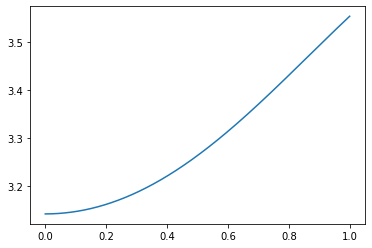

In [53]:
plt.plot(t, sol)

So this is a numerical solution but let's trust that the contributers to python are better at ODEs than we are.

## Euler's Method

For our first method, we will approximate the solution by computing the next value using
$$
y_{i+1} = y_i + f(x_i,y_i)h
$$
for h the step size, $h = x_{i+1}-x_i$.

In [38]:
def eulerMethod(function,initialValue,intervalForSolution):
  array = []
  y=initialValue
  h = intervalForSolution[1]-intervalForSolution[0]
  for i in intervalForSolution:
    array.append([y])
    y = y + f(i,y)*h
  return np.array(array)




In [54]:
mysol = eulerMethod(f,np.pi,t)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in double_scalars
  """Entry point for launching an IPython kernel.


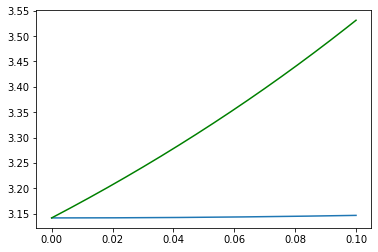

In [59]:
plt.plot(t[0:10000], sol[0:10000])
plt.plot(t[0:10000], mysol[0:10000],'g')

I played with this a lot!  I cannot get this answer to do much better.  My guess is that since my $f(x,y)$ is highly non-linear, the linear assumption of Euler's method is a bad idea!  Let's see if we can do any better with the Runga-Kutta Method.

##Simpson's $\frac13$ Rule

Simpson's $\frac 13$ rule states that 
$$
\int_a^b f(x)\ dx
\approx 
\frac{\Delta x}3 
\left[
f(a)
+
4\sum_{odd} f(x_i)
+
2\sum_{even} f(x_i)
+
f(b)
\right]
$$

In [ ]:
def simpson(function, a, b , n):
  dx = deltax(a,b,n)
  sum = 0
  for i in range(1,n,2): #odds
    sum = sum + 4*function(a+dx*i)
  for i in range(0,n,2): #evens
    sum = sum + 2*function(a+dx*i)
  for i in [a,b]: #endpoints
    sum = sum + function(i)
  sum = dx /3 *sum #multiply by the width/3
  return sum

In [ ]:
simpson(np.sin, 0 , np.pi,1000)

2.0000000000010787